In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz
% matplotlib inline

## Wisconsin Breast Cancer Database

In [57]:
# import the data
bcw_data = pd.read_csv(os.path.join("data", "uci", "breast-cancer-wisconsin.data"), na_values="?", header=None)

# set the column names
bcw_data.columns = ["ID","THICKNESS","CELL_SIZE_UNIFORMITY","CELL_SHAPE_UNIFORMITY","MARGINAL_ADHESION","EPI_CELL_SIZE","BARE_NUCLEI","BLAND_CHROMATIN","NORMAL_NUCLEOLI","MITOSES","CLASS"]

# remove NAs
bcw_data = bcw_data.dropna(axis=0, how="any")

y1 = bcw_data.pop("CLASS")
X1 = bcw_data

# split the data
X_tr, X_te, y_tr, y_te = train_test_split(X1, y1, test_size=0.2, random_state=0)
print("X_tr:", X_tr.shape)
print("X_te:", X_te.shape)
print("y_tr:", y_tr.shape)
print("y_te:", y_te.shape)

X_tr: (546, 10)
X_te: (137, 10)
y_tr: (546,)
y_te: (137,)


In [58]:
# the baseline distribution
pd.value_counts(y1, normalize=True)

2    0.650073
4    0.349927
Name: CLASS, dtype: float64

In [59]:
# create a decision tree and a grid search
pipe1 = Pipeline([
    ('pca', None),
    ('scaler', None),
    ('dt', DecisionTreeClassifier(criterion='gini',random_state=0))
])


grid1 = {
    'dt__max_depth': [2,3, 4, 5, 7, 10, 15, 20],
}

grid_cv1 = GridSearchCV(pipe1, grid1, cv=5)

# fit the model
grid_cv1.fit(X_tr, y_tr)

# Collect results and sort them
df1 = pd.DataFrame.from_items([
    ('max_depth', grid_cv1.cv_results_['param_dt__max_depth']),
    ('mean_te', grid_cv1.cv_results_['mean_test_score'])
])

df1.sort_values(by='mean_te', ascending=False).head(10)

,max_depth,mean_te
3,5,0.952381
2,4,0.945055
4,7,0.945055
1,3,0.941392
5,10,0.941392
6,15,0.941392
7,20,0.941392
0,2,0.915751


In [62]:
print("Test Accuracy:",grid_cv1.score(X_te, y_te))

# get the best max_depth
best_idx1 = np.argmax(df1.mean_te)
max_depth1 = df1.max_depth[best_idx1]

Test Accuracy: 0.9416058394160584


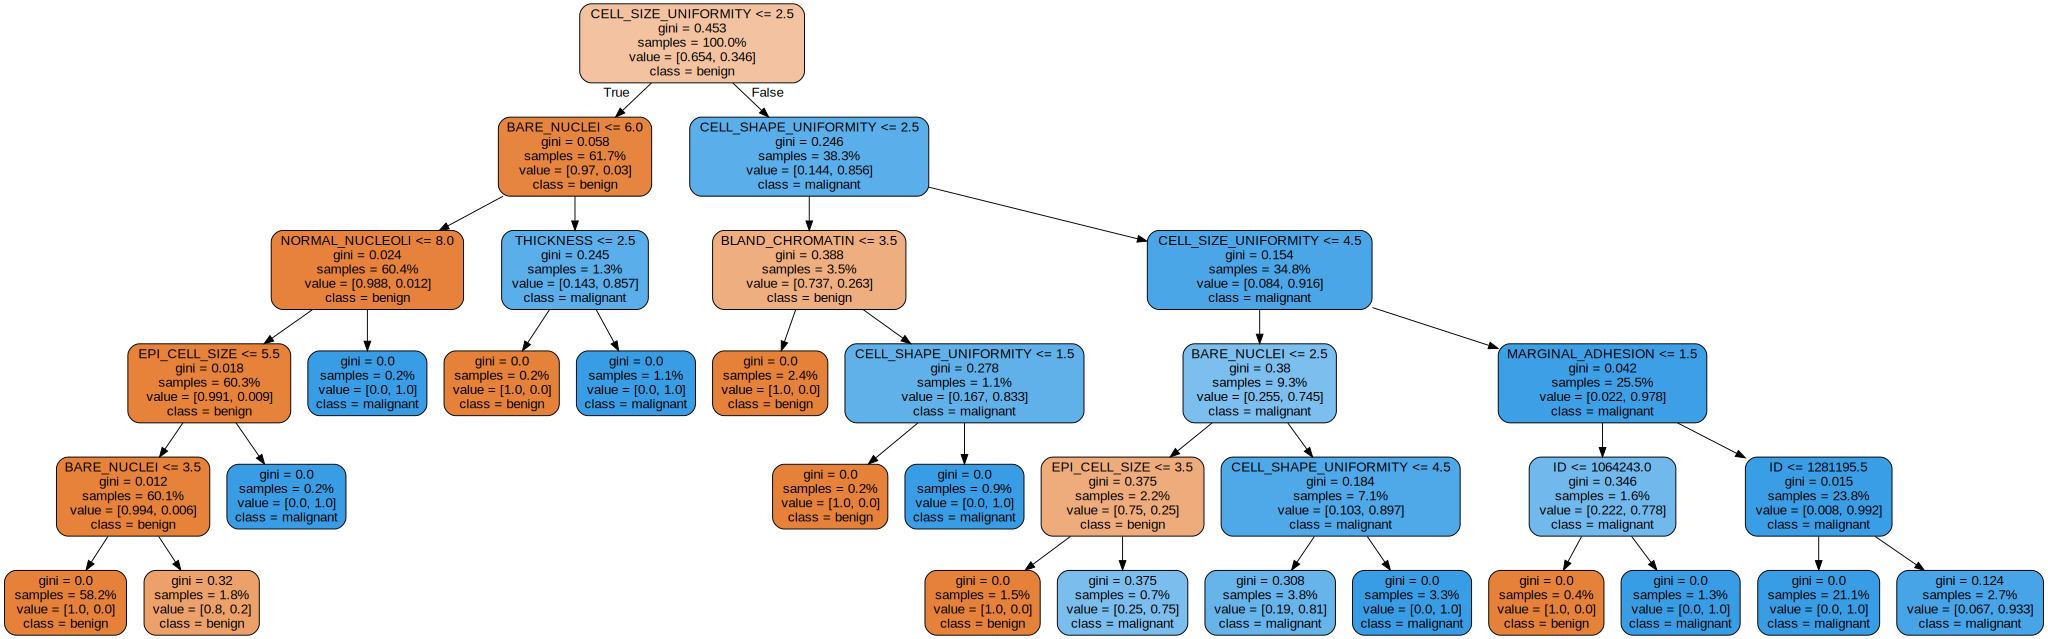

In [37]:
# create a decision tree with the best parameters
dt1 = DecisionTreeClassifier(criterion='gini',random_state=0, max_depth=max_depth1)
dt1.fit(X_tr, y_tr)

# Export decision tree
dot_data = export_graphviz(
    dt1, out_file=None,
    feature_names=X_tr.columns, class_names=['benign', 'malignant'],
    filled=True, rounded=True, proportion=True   
)

# Display decision tree
graphviz.Source(dot_data)

## Wisconsin Diagnostic Breast Cancer (WDBC)

In [63]:
# import the data
wdbc_data = pd.read_csv(os.path.join("data", "uci", "wdbc.data"), na_values="?", header=None)

# set the column names
wdbc_data=wdbc_data.rename(columns = {0:'ID', 1:"CLASS", 2: "MEAN_RADIUS", 3: "MEAN_TEXTURE", 4: "MEAN_PERIMETER", 5: "MEAN_AREA", 6: "MEAN_SMOOTHNESS", 7: "MEAN_COMPACTNESS", 8: "MEAN_CONCAVITY", 9:"MEAN_CONCAVE_POINTS", 10: "MEAN_SYMMETRY", 11: "MEAN_FRACTAL_DIMENSIONS", 12: "RADIUS_SE", 13: "TEXTURE_SE", 14: "PERIMETER_SE", 15: "AREA_SE", 16: "SMOOTHNESS_SE", 17: "COMPACTNESS_SE", 18: "CONCAVITY_SE", 19: "CONCAVE_POINTS_SE", 20: "SYMMETRY_SE",21: "FRACTAL_DIMENSIONS_SE", 22: "WORST_RADIUS", 23: "WORST_TEXTURE", 24: "WORST_PERIMETER", 25: "WORST_AREA", 26: "WORST_SMOOTHNESS", 27: "WORST_COMPACTNESS", 28: "WORST_CONCAVITY", 29: "WORST_CONCAVE_POINTS", 30: "WORST_SYMMETRY", 31: "WORST_FRACTAL_DIMENSIONS"})

wdbc_data = wdbc_data.dropna(axis=0, how="any")

y2 = wdbc_data.pop("CLASS")
X2 = wdbc_data

# split the data
X_tr, X_te, y_tr, y_te = train_test_split(X2, y2, test_size=0.2, random_state=0)
print("X_tr:", X_tr.shape)
print("X_te:", X_te.shape)
print("y_tr:", y_tr.shape)
print("y_te:", y_te.shape)

X_tr: (455, 31)
X_te: (114, 31)
y_tr: (455,)
y_te: (114,)


In [64]:
# the baseline distribution
pd.value_counts(y2, normalize=True)

B    0.627417
M    0.372583
Name: CLASS, dtype: float64

In [65]:
# create a decision tree and a grid search
pipe2 = Pipeline([
    ('pca', None),
    ('scaler', None),
    ('dt', DecisionTreeClassifier(criterion='gini',random_state=0))
])


grid2 = {
    'dt__max_depth': [2, 3, 4, 5, 7, 10, 15, 20],
}

grid_cv2 = GridSearchCV(pipe2, grid2, cv=5)

# fit the model
grid_cv2.fit(X_tr, y_tr)

# Collect results and sort them
df2 = pd.DataFrame.from_items([
    ('max_depth', grid_cv2.cv_results_['param_dt__max_depth']),
    ('mean_te', grid_cv2.cv_results_['mean_test_score'])
])

df2.sort_values(by='mean_te', ascending=False).head(10)

,max_depth,mean_te
0,2,0.918681
3,5,0.918681
2,4,0.916484
1,3,0.909890
4,7,0.909890
5,10,0.907692
6,15,0.907692
7,20,0.907692


In [67]:
print("Test Accuracy:",grid_cv2.score(X_te, y_te))

# get the best max_depth
best_idx2 = np.argmax(df2.mean_te)
max_depth2 = df2.max_depth[best_idx2]

Test Accuracy: 0.9649122807017544


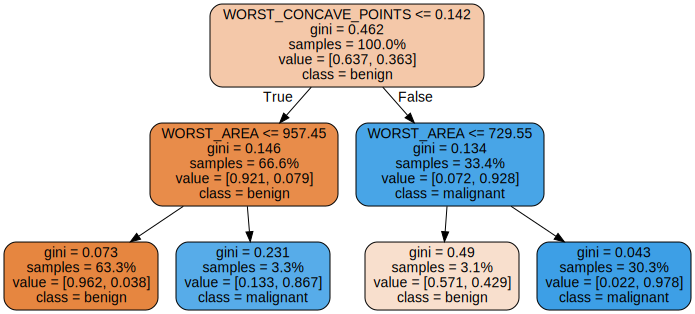

In [68]:
# create a decision tree with the best parameters
dt2 = DecisionTreeClassifier(criterion='gini',random_state=0, max_depth=max_depth2)
dt2.fit(X_tr, y_tr)

# Export decision tree
dot_data2 = export_graphviz(
    dt2, out_file=None,
    feature_names=X_tr.columns, class_names=['benign', 'malignant'],
    filled=True, rounded=True, proportion=True   
)

# Display decision tree
graphviz.Source(dot_data2)

## Wisconsin Prognostic Breast Cancer (WPBC)

In [69]:
# import the data
wpbc_data = pd.read_csv(os.path.join("data", "uci", "wpbc.data"), na_values="?", header=None)

# set the column names
wpbc_data=wpbc_data.rename(columns = {0:'ID', 1:"CLASS", 2: "TIME", 3: "MEAN_RADIUS", 4: "MEAN_TEXTURE", 5: "MEAN_PERIMITER", 6: "MEAN_AREA", 7: "MEAN_SMOOTHNESS", 8: "MEAN_COMPACTNESS", 9: "MEAN_CONCAVITY", 10:"MEAN_CONCAVE_POINTS", 11: "MEAN_SYMMETRY", 12: "MEAN_FRACTAL_DIMENSIONS", 13: "RADIUS_SE", 14: "TEXTURE_SE", 15: "PERIMETER_SE", 16: "AREA_SE", 17: "SMOOTHNESS_SE", 18: "COMPACTNESS_SE", 19: "CONCAVITY_SE", 20: "CONCAVE_POINTS_SE", 21: "SYMMETRY_SE",22: "FRACTAL_DIMENSIONS_SE", 23: "WORST_RADIUS", 24: "WORST_TEXTURE", 25: "WORST_PERIMETER", 26: "WORST_AREA", 27: "WORST_SMOOTHNESS", 28: "WORST_COMPACTNESS", 29: "WORST_CONCAVITY", 30: "WORST_CONCAVE_POINTS", 31: "WORST_SYMMETRY", 32: "WORST_FRACTAL_DIMENSIONS", 33: "TUMOR_SIZE", 34: "LYMPH_STATUS"})

wpbc_data = wpbc_data.dropna(axis=0, how="any")

y3 = wpbc_data.pop("CLASS")
X3 = wpbc_data

# split the data
X_tr, X_te, y_tr, y_te = train_test_split(X3, y3, test_size=0.2, random_state=0)
print("X_tr:", X_tr.shape)
print("X_te:", X_te.shape)
print("y_tr:", y_tr.shape)
print("y_te:", y_te.shape)

X_tr: (155, 34)
X_te: (39, 34)
y_tr: (155,)
y_te: (39,)


In [70]:
# the baseline distribution
pd.value_counts(y3, normalize=True)

N    0.762887
R    0.237113
Name: CLASS, dtype: float64

In [71]:
# create a decision tree and a grid search
pipe3 = Pipeline([
    ('pca', None),
    ('scaler', None),
    ('dt', DecisionTreeClassifier(criterion='gini',random_state=0))
])


grid3 = {
    'dt__max_depth': [2, 3, 4, 5, 7, 10, 15, 20, 25],
}

grid_cv3 = GridSearchCV(pipe3, grid3, cv=5)

# fit the model
grid_cv3.fit(X_tr, y_tr)

# Collect results and sort them
df3 = pd.DataFrame.from_items([
    ('max_depth', grid_cv3.cv_results_['param_dt__max_depth']),
    ('mean_te', grid_cv3.cv_results_['mean_test_score'])
])

df3.sort_values(by='mean_te', ascending=False).head(10)

,max_depth,mean_te
1,3,0.761290
2,4,0.761290
0,2,0.754839
3,5,0.754839
4,7,0.754839
5,10,0.748387
6,15,0.748387
7,20,0.748387
8,25,0.748387


In [72]:
print("Test Accuracy:",grid_cv3.score(X_te, y_te))

# get the best max_depth
best_idx3 = np.argmax(df3.mean_te)
max_depth3 = df3.max_depth[best_idx3]

Test Accuracy: 0.6923076923076923


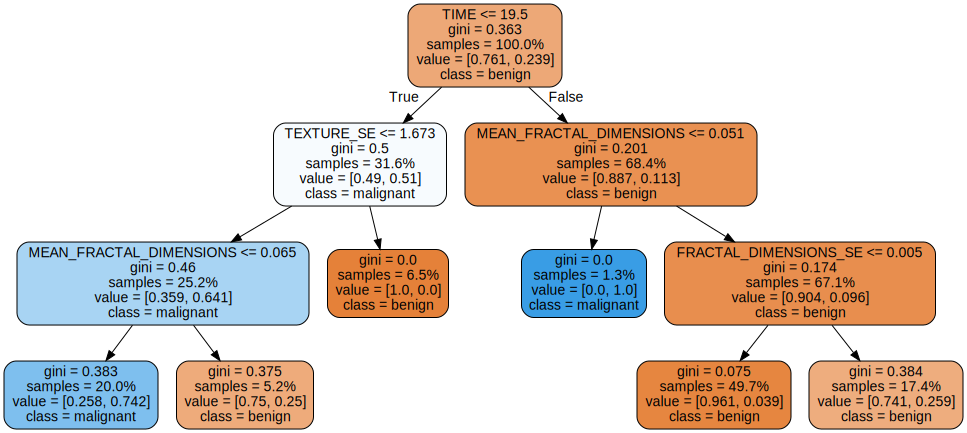

In [73]:
# create a decision tree with the best parameters
dt3 = DecisionTreeClassifier(criterion='gini',random_state=0, max_depth=max_depth3)
dt3.fit(X_tr, y_tr)

# Export decision tree
dot_data3 = export_graphviz(
    dt3, out_file=None,
    feature_names=X_tr.columns, class_names=['benign', 'malignant'],
    filled=True, rounded=True, proportion=True   
)

# Display decision tree
graphviz.Source(dot_data3)